## Intermediate Pandas



Today we look at some ways to use Pandas DataFrames like databases.



### Revisiting a previous example with batches of data



We start with the example we looked at before. It is a dataset from a set of experiments. The experiments are grouped by the Day they were run on. We will use Pandas to do some analysis by the day.



In [1]:
import pandas as pd
df = pd.read_csv('04-p-t.dat', delimiter='\s+', skiprows=2,
                 names=['Run order', 'Day', 'Ambient Temperature', 'Temperature',
                        'Pressure', 'Fitted Value', 'Residual'])
df

Run order  Day  Ambient Temperature  Temperature  Pressure  Fitted Value  \
0           1    1               23.820       54.749   225.066       222.920
1           2    1               24.120       23.323   100.331        99.411
2           3    1               23.434       58.775   230.863       238.744
3           4    1               23.993       25.854   106.160       109.359
4           5    1               23.375       68.297   277.502       276.165
5           6    1               23.233       37.481   148.314       155.056
6           7    1               24.162       49.542   197.562       202.456
7           8    1               23.667       34.101   138.537       141.770
8           9    1               24.056       33.901   137.969       140.983
9          10    1               22.786       29.242   117.410       122.674
10         11    2               23.785       39.506   164.442       163.013
11         12    2               22.987       43.004   181.044       176.759


The first aggregation we will look at is how to make groups of data that are related by values in a column.  We use the `groupby` function ([https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)), and specify a column to group on. The result is a `DataFrameGroupBy` object, which we next have to work with.



In [1]:
groups = df.groupby('Day')
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

The groups can describe themselves. Here we see we get 4 groups, one for each day, and you can see some statistics about each group. We do not need those for now.



In [1]:
groups.describe()

Run order                                                 \
        count  mean      std   min    25%   50%    75%   max
Day
1        10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0
2        10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0
3        10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0
4        10.0  35.5  3.02765  31.0  33.25  35.5  37.75  40.0
:
    Ambient Temperature           ... Fitted Value          Residual          \
                  count     mean  ...          75%      max    count    mean
Day                               ...
1                  10.0  23.6646  ...    217.80400  276.165     10.0 -2.9823
2                  10.0  23.7758  ...    244.69725  278.040     10.0  2.6827
3                  10.0  24.2883  ...    205.81225  225.282     10.0 -0.6690
4                  10.0  23.5207  ...    206.10075  231.697     10.0  0.9687
:
:
          std    min      25%     50%      75%    max
Day
1    3.452383 -7.881 -5.17100 -3.2155 -0.06350  2.146
2    3.606

We can get a dictionary of the group names and labels from the groups attribute.



In [1]:
groups.groups

{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 3: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 4: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}

We can get the subset of rows from those group labels.



In [1]:
df.loc[groups.groups[2]]

Run order  Day  Ambient Temperature  Temperature  Pressure  Fitted Value  \
10         11    2               23.785       39.506   164.442       163.013
11         12    2               22.987       43.004   181.044       176.759
12         13    2               23.799       53.226   222.179       216.933
13         14    2               23.661       54.467   227.010       221.813
14         15    2               23.852       57.549   232.496       233.925
15         16    2               23.379       61.204   253.557       248.288
16         17    2               24.146       31.489   139.894       131.506
17         18    2               24.187       68.476   273.931       276.871
18         19    2               24.159       51.144   207.969       208.753
19         20    2               23.803       68.774   280.205       278.040
:
    Residual
10     1.429
11     4.285
12     5.246
13     5.198
14    -1.429
15     5.269
16     8.388
17    -2.940
18    -0.784
19     2.165

We don't usually work with groups that way though, it is more common to do some analysis on each group.

Suppose we want to plot the Pressure vs Temperature for each group, so we can see visually if there are any trends that could be attributed to the group. To do this, we need to *iterate* over the groups and then make a plot on each one.

A `DataFrameGroupBy` is *iterable* and when you loop over it, you get the `key` it was grouped on, and a DataFrame that contains the items in the group. Here we loop over each group, and plot each group with a different color.



Text(0, 0.5, 'Pressure')

<Figure size 432x288 with 1 Axes>

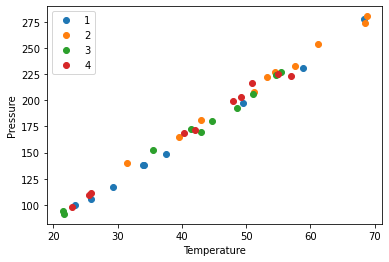

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for (day, group) in groups:
    group.plot('Temperature', 'Pressure', ax=ax, label=f'{day}', style='o')
plt.ylabel('Pressure')

the point of this is we cannot see a visual clustering of the groups by day. That is important, because if we did it could suggest something was different that day.



### Combining data sets



Siddhant Lambor provided from two experiments conducted to measure the properties of a worm-like micelles solution. He had carried out experiments on a rheometer to measure the viscosity of a worm-like micelles solution in a Couette cell geometry and a Cone and Plate geometry. Ideally, there should not be a difference as viscosity is intrinsic to the fluid. Analysis of this data will confirm if that is true. First, we read this data in from the two data files.



In [1]:
couette = pd.read_excel('couette.xls',
                   sheet_name='Flow sweep - 1',
                   header=1) # sheet name is case sensitive, excel file name is not

couette

Stress Shear rate  Viscosity Step time Temperature Normal stress
0           Pa        1/s       Pa.s         s          °C            Pa
1   0.00998055  0.0495302   0.201504   35.1469      25.001    -0.0012628
2    0.0158174  0.0798746   0.198028   70.1689      25.001  -0.000834764
3    0.0250712   0.127313   0.196926   105.253          25  -0.000912531
4    0.0397339   0.204094   0.194685    140.26          25    -0.0011322
5    0.0629772   0.327253   0.192442   175.313          25   -0.00202574
6    0.0998057   0.530364   0.188183    210.32      24.998   -0.00242923
7     0.158165   0.875494   0.180658   245.373          25   -0.00183708
8     0.250637    1.49135   0.168061   280.426      25.002   -0.00165476
9     0.397131    2.64707   0.150027   315.433      25.001   -0.00188881
10    0.629111    5.00904   0.125595   350.501      25.003   -0.00223333
11    0.996153    10.3993  0.0957901   385.508      24.996   -0.00180735
12     1.57528    24.5624  0.0641337   420.608      24.998 

We can drop the row at index 0, it just has the units in it. With this syntax, we have to save the resulting DataFrame back into the variable, or it will not be changed.



In [1]:
couette = couette.drop(0)
couette

Stress Shear rate  Viscosity Step time Temperature Normal stress
1   0.00998055  0.0495302   0.201504   35.1469      25.001    -0.0012628
2    0.0158174  0.0798746   0.198028   70.1689      25.001  -0.000834764
3    0.0250712   0.127313   0.196926   105.253          25  -0.000912531
4    0.0397339   0.204094   0.194685    140.26          25    -0.0011322
5    0.0629772   0.327253   0.192442   175.313          25   -0.00202574
6    0.0998057   0.530364   0.188183    210.32      24.998   -0.00242923
7     0.158165   0.875494   0.180658   245.373          25   -0.00183708
8     0.250637    1.49135   0.168061   280.426      25.002   -0.00165476
9     0.397131    2.64707   0.150027   315.433      25.001   -0.00188881
10    0.629111    5.00904   0.125595   350.501      25.003   -0.00223333
11    0.996153    10.3993  0.0957901   385.508      24.996   -0.00180735
12     1.57528    24.5624  0.0641337   420.608      24.998   -0.00182336
13     2.47652    67.2972  0.0367998    455.63      25.003 

There is a second file called cp.xls we want to combine with this. Here, we combine the drop function all into one line.



In [1]:
conePlate = pd.read_excel('cp.xls', sheet_name='Flow sweep - 1', header=1).drop(0)
conePlate.head(5)

Stress Shear rate Viscosity Step time Temperature Normal stress
1  0.00998397   0.053193  0.187693   34.9909          25        1.2658
2   0.0158219  0.0820001   0.19295   70.0909      25.001      0.569149
3   0.0250778   0.129969  0.192952    105.16          25      0.295899
4   0.0397587    0.20176   0.19706   140.213          25        1.0171
5   0.0629878   0.336087  0.187415   175.282          25      0.546196

For this analysis, we are only interested in the shear rate, stress and viscosity values. Let us drop the other columns. We do that by the names, and specify inplace=True, which modifies the DataFrame itself.



In [1]:
conePlate.drop(['Temperature', 'Step time', 'Normal stress'], axis=1, inplace=True)
# if we do not use inplace=True, the data frame will not be changed. It would by default create a new data frame
# and we would have to assign a different variable to capture this change.
conePlate.head(5)

Stress Shear rate Viscosity
1  0.00998397   0.053193  0.187693
2   0.0158219  0.0820001   0.19295
3   0.0250778   0.129969  0.192952
4   0.0397587    0.20176   0.19706
5   0.0629878   0.336087  0.187415

We also do that for the couette data. Here we did not use `inplace=True`, so we have to save the result back into the variable to get the change.



In [1]:
couette = couette.drop(['Temperature', 'Step time', 'Normal stress'], axis=1)   # without using inplace = True
couette.head(5)

Stress Shear rate Viscosity
1  0.00998055  0.0495302  0.201504
2   0.0158174  0.0798746  0.198028
3   0.0250712   0.127313  0.196926
4   0.0397339   0.204094  0.194685
5   0.0629772   0.327253  0.192442

We can see info about each DataFrame like this.



In [1]:
couette.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Stress      14 non-null     object
 1   Shear rate  14 non-null     object
 2   Viscosity   14 non-null     object
dtypes: object(3)
memory usage: 448.0+ bytes

In [1]:
conePlate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Stress      17 non-null     object
 1   Shear rate  17 non-null     object
 2   Viscosity   17 non-null     object
dtypes: object(3)
memory usage: 544.0+ bytes

We could proceed to analyze the DataFrames separately, but instead, we will combine them into one DataFrame. Before doing that, we need to add a column to each one so we know which data set is which. Simply assigning a value to a new column name will do that.



In [1]:
couette['type'] = 'couette'
couette

Stress Shear rate  Viscosity     type
1   0.00998055  0.0495302   0.201504  couette
2    0.0158174  0.0798746   0.198028  couette
3    0.0250712   0.127313   0.196926  couette
4    0.0397339   0.204094   0.194685  couette
5    0.0629772   0.327253   0.192442  couette
6    0.0998057   0.530364   0.188183  couette
7     0.158165   0.875494   0.180658  couette
8     0.250637    1.49135   0.168061  couette
9     0.397131    2.64707   0.150027  couette
10    0.629111    5.00904   0.125595  couette
11    0.996153    10.3993  0.0957901  couette
12     1.57528    24.5624  0.0641337  couette
13     2.47652    67.2972  0.0367998  couette
14     3.75092    210.991  0.0177776  couette

In [1]:
conePlate['type'] = 'cone'

Now, we can combine these into a single DataFrame. This is not critical, and you can get by without it, but I want to explore the idea, and illustrate it is possible.



In [1]:
df = pd.concat([conePlate, couette])
df

Stress Shear rate   Viscosity     type
1   0.00998397   0.053193    0.187693     cone
2    0.0158219  0.0820001     0.19295     cone
3    0.0250778   0.129969    0.192952     cone
4    0.0397587    0.20176     0.19706     cone
5    0.0629878   0.336087    0.187415     cone
6      0.09982   0.556749    0.179291     cone
7      0.15819   0.925403    0.170942     cone
8     0.250701    1.57526    0.159148     cone
9     0.397263      2.782    0.142798     cone
10    0.629346    5.16333    0.121888     cone
11    0.996863    10.4029   0.0958258     cone
12     1.57768    23.6558   0.0666931     cone
13     2.49053    62.5901   0.0397912     cone
14     3.85502    194.265   0.0198441     cone
15     5.45425    795.474   0.0068566     cone
16     8.62182    2011.14  0.00428704     cone
17     13.7498    3633.47  0.00378421     cone
1   0.00998055  0.0495302    0.201504  couette
2    0.0158174  0.0798746    0.198028  couette
3    0.0250712   0.127313    0.196926  couette
4    0.0397339   0.20

Finally, we are ready for the visualization. We will group the DataFrame and then make plots for each group. Here we illustrate several new arguments, including loglog plots, secondary axes, colored tick labels, and multiple legends.



Text(0.5, 1.0, 'Comparison of Cone and Plate with Couette Cell')

<Figure size 432x288 with 2 Axes>

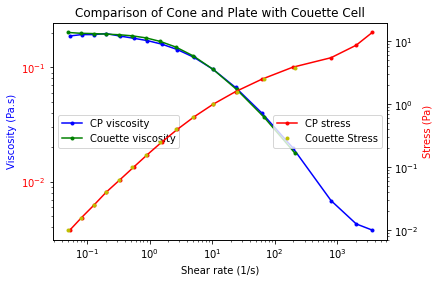

In [1]:
g = df.groupby('type')
ax1 = g.get_group('cone').plot('Shear rate', 'Viscosity',
                               logx=True, logy=True, style='b.-',
                               label="CP viscosity")

g.get_group('couette').plot('Shear rate', 'Viscosity', logx=True, logy=True,
                            style='g.-', ax=ax1, label="Couette viscosity")

ax2 = g.get_group('cone').plot('Shear rate', 'Stress', secondary_y=True,
                               logx=True, logy=True, style='r.-',
                               ax=ax1, label="CP stress")

g.get_group('couette').plot('Shear rate', 'Stress', secondary_y=True,
                            logx=True, logy = True, style='y.', ax=ax2,
                            label="Couette Stress")

# Setting y axis labels
ax1.set_ylabel("Viscosity (Pa.s)", color='b')
[ticklabel.set_color('b') for ticklabel in ax1.get_yticklabels()]

ax2.set_ylabel("Stress (Pa)", color='r')
[ticklabel.set_color('r') for ticklabel in ax1.get_yticklabels()]

# setting legend locations
ax1.legend(loc=6)
ax2.legend(loc=7)

ax1.set_xlabel("Shear rate (1/s)")
plt.title("Comparison of Cone and Plate with Couette Cell")

So, in fact we can see these two experiments are practically equivalent.

